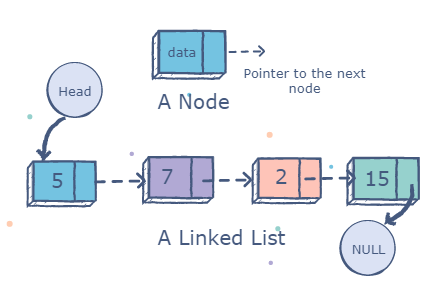

# 단순연결리스트
- 동적 메모리 할당을 이용해 리스트를 구현하는 가장 간단한 형태의 자료구조
- 삽입이나 삭제 시 항목들을 이동시킬 필요가 없다
- 항목에 접근하기 위해서 순차탐색을 해야만 하고, 삽입이나 삭제할 때에 반드시 이전 노드를 가리키는 레퍼런스를 알아야 한다.

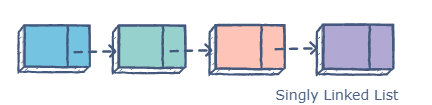

In [2]:
class SList:
    class Node:       
        def __init__(self, item, link): # 노드 생성자 : 항목과 다음 노드 레퍼런스
            self.item = item
            self.next = link
        
    def __init__(self): # 단순연결리스트 생성자 : head와 항목 수(size)로 구성
        self.head = None
        self.size = 0
        
    def size(self): return self.size # == get.size
    def is_empty(self): return self.size == 0 # T/F 반환
    
    def insert_front(self, item): # 첫 노드로 삽입
        if self.is_empty():
            self.head = self.Node(item, None)
        else:
            self.head = self.Node(item, self.head)
        self.size += 1
     
    def insert_after(self, item, p): # p 다음에 삽입  
        p.next = SList.Node(item, p.next)
        self.size += 1  
        
    def delete_front(self): # 첫 노드 삭제
        if self.is_empty():
            raise EmptyError('Underflow')
        else:
            self.head = self.head.next
            self.size -= 1

    def delete_after(self, p): # p 다음 노드 삭제 
        if self.is_empty(): 
            raise EmptyError('Underflow')
        t = p.next
        p.next = t.next
        self.size -= 1
    
    def search(self, target): # target 탐색
        p = self.head
        for k in range(self.size):
            if target == p.item: return k
            p = p.next
        return None

    def print_list(self): # 연결리스트 출력
        p = self.head
        while p:
            if p.next != None:
                print(p.item, ' -> ', end='')
            else:
                print(p.item)
            p = p.next
            
class EmptyError(Exception): # underflow 시 에러 처리
    pass

In [5]:
from SList import *
if __name__ == '__main__':
    s = SList()
    s.insert_front('orange')
    s.insert_front('apple')
    s.insert_after('cherry', s.head.next)
    s.insert_front('pear')  
    s.print_list()
    print('cherry는  %d번째' % s.search('cherry'))
    print('kiwi는', s.search('kiwi'))
    print('배 다음 노드 삭제 후:\t\t', end='')
    s.delete_after(s.head)
    s.print_list()
    print('첫 노드 삭제 후:\t\t', end='')
    s.delete_front()
    s.print_list()
    print('첫 노드로 망고,딸기 삽입 후:\t', end='')
    s.insert_front('mango')
    s.insert_front('strawberry')
    s.print_list()
    s.delete_after(s.head.next.next)
    print('오렌지 다음 노드 삭제 후:\t', end='')
    s.print_list()  

ModuleNotFoundError: No module named 'SList'

# 이중연결리스트
- 각 노드에 2개의 레퍼런스를 가지며 각각 이전과 다음 노드를 가리키는 방식의 연결리스트이다.

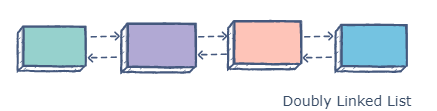

In [6]:
class DList:   
    class Node: 
        def __init__(self, item, prev, link): # 노드 생성자
            self.item = item 
            self.prev = prev 
            self.next = link 

    def __init__(self): # 이중연결리스트 생성자
        self.head = self.Node(None, None, None)
        self.tail = self.Node(None, self.head, None)
        self.head.next = self.tail     
        self.size = 0  # 항목 수

    def size(self): return self.size
    def is_empty(self): return self.size == 0

    def insert_before(self, p, item): # p 앞에 삽입
        t = p.prev
        n = self.Node(item, t, p)
        p.prev = n
        t.next = n
        self.size += 1
     
    def insert_after(self, p, item): # p 다음에 삽입
        t = p.next
        n = self.Node(item, p, t)
        t.prev = n
        p.next = n
        self.size += 1

    def delete(self, x): # x가 참조하는 노드 삭제
        f = x.prev
        r = x.next
        f.next = r
        r.prev = f
        self.size -= 1  
        return x.item 

    def print_list(self):  # 리스트 출력
        if self.is_empty():
            print('리스트 비어있음')
        else: 
            p = self.head.next
            while p != self.tail:
                if p.next != self.tail:
                    print(p.item, ' <=> ', end='')
                else:
                    print(p.item)
                p = p.next
            
class EmptyError(Exception): # underflow 시 에러 처리
    pass

In [7]:
from dlist import DList
if __name__ == '__main__':
    s = DList()
    s.insert_after(s.head,'apple')
    s.insert_before(s.tail, 'orange')
    s.insert_before(s.tail,'cherry')
    s.insert_after(s.head.next,'pear')
    s.print_list()
    print('마지막 노드 삭제 후:\t', end='')
    s.delete(s.tail.prev)
    s.print_list() 
    print('맨 끝에 포도 삽입 후:\t', end='')
    s.insert_before(s.tail,'grape')
    s.print_list()
    print('첫 노드 삭제 후:\t', end='')   
    s.delete(s.head.next)
    s.print_list()
    print('첫 노드 삭제 후:\t', end='')    
    s.delete(s.head.next)
    s.print_list()
    print('첫 노드 삭제 후:\t', end='') 
    s.delete(s.head.next)
    s.print_list()
    print('첫 노드 삭제 후:\t', end='') 
    s.delete(s.head.next)
    s.print_list()

ModuleNotFoundError: No module named 'dlist'

# 원형연결리스트
- 마지막 노드가 첫 노드와 연결된 단순연결리스트
- 마지막 노드와 첫 노드를 O(1)시간에 방문할 수 있다는 장점이 있음.
- 연결리스트가 empty가 아닐 때, 어떤 노드도 None 레퍼런스를 갖지 않으므로 프로그램에서 None 조건을 검사하지 않아도 된다

In [8]:
class CList:   
    class _Node: 
        def __init__(self, item, link): # 노드 생성자
            self.item = item
            self.next = link

    def __init__(self): # 환형연결리스트 생성자
        self.last = None # CList의 마지막 노드
        self.size = 0    # 항목 수

    def no_items(self):  return self.size
    def is_empty(self):  return self.size == 0

    def insert(self, item):
        n = self._Node(item, None)  
        if self.is_empty(): # 리스트가 empty일 때
            n.next = n
            self.last = n
        else: # 정상적인 삽입
            n.next = self.last.next  # 새 노드가 last가 참조하는 노드의 다음노드를 참조
            self.last.next = n  # last가 참조하는 노드의 다음 노드가 새 노드가 되도록
        self.size += 1
        
    def first(self): # 첫 노드 접근
        if self.is_empty():
            raise EmptyError('Underflow')
        f = self.last.next
        return f.item

    def delete(self): # 첫 노드 삭제
        if self.is_empty():
            raise EmptyError('Underflow')
        x = self.last.next
        if self.size == 1:   # 1개뿐인 노드 제거
            self.last = None # empty 리스트가 됨
        else:
            self.last.next = x.next # 첫 노드 제거
        self.size -= 1
        return x.item

    def print_list(self): # 연결리스트 출력
        if self.is_empty():
            print('리스트 비어있음')
        else: 
            f = self.last.next
            p = f
            while p.next != f:
                print(p.item, ' -> ', end='')
                p = p.next
            print(p.item)        
        
class EmptyError(Exception): # underflow 시 에러 처리
    pass

In [9]:
from clist import CList
if __name__ == '__main__':
    s = CList()
    s.insert('pear')
    s.insert('cherry')
    s.insert('orange')
    s.insert('apple') 
    s.print_list()
    print('s의 길이 =', s.no_items()) 
    print('s의 첫 항목 :', s.first())
    s.delete() 
    print('첫 노드 삭제 후: ', end='')
    s.print_list()
    print('s의 길이 =', s.no_items()) 
    print('s의 첫 항목 :', s.first()) 
    s.delete() 
    print('첫 노드 삭제 후: ', end='')
    s.print_list()
    s.delete() 
    print('첫 노드 삭제 후: ', end='')
    s.print_list()
    s.delete() 
    print('첫 노드 삭제 후: ', end='')
    s.print_list()

ModuleNotFoundError: No module named 'clist'